# 2487-2122 Machine Learning Assignment 2 

The assignment will contain 1 questions with subquestions for 100% of the total points. 
 

## Call Me Maybe? (100 points)



![telemarketing](https://neilpatel.com/wp-content/uploads/2019/08/profissional-de-telemarketing-sorridente.jpeg)

Telemarketing is a method of direct marketing in which a salesperson solicits prospective customers to buy products or services over the phone. It has become one of the most widely used marketing campaign methods to engage with customers with product and service opportunity. We have collected real data from a Portuguese retail bank, from May 2008 to June 2013 with thousands of phone contacts. 




The current practice of many data teams is to build such propensity models and predict customer's probability to adopt the product and target them from the highest probability to the lowest probability. Note that telemarketing may incur some costs for contacting the customer, thus the success (i.e., the generated profit) of using machine learning model requries further inspection.  As the data scientist, you are asked to build a propensity model to evaluate the effectiveness of their telemarketing campaigns, i.e. whether the customer subscribed to the term deposit.  

**Telemarketing Dataset (bank.csv)**
All customers are contained in the file bank.csv. Each line of this file after the header row represents one customer of the Portuguese bank, and has the following format:

### bank client data:
- age (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'primary', 'secondary', 'tertiary')
- balance: amcount of bank account balance
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')

### related with the last contact of the current campaign:
- contact: contact communication type (categorical: 'cellular','telephone', 'unknown')
- day: last contact day of month
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. 

### other attributes:
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
- y - has the client subscribed a term deposit? (binary: 'yes','no')


Answer the following questions using the provided dataset. You can write down intermediate results towards the final answers. If any model invovles random_state, set it to be 42.

In [1]:
import pandas as pd
import numpy as np

In [2]:
bank = pd.read_csv('bank.csv', sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [4]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [5]:
bank.y.value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [32]:
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

The customer adoption behavior is quite unbalanced, with only 12% of customers subscriber the term deposit.

### Question 1 (30 points)

Split the data into 80% training set and 20% test set. **Build a pipeline to preprocess the indicated numerical features and categorical features separately**. For numerical features 'balance', 'campaign', standardize these features. For categorical features 'job', 'marital', 'education', 'default', transform them through one-hot encoding. For the numeric feature 'age', convert it into the quartile categorical variable and transform it through one-hot encoding. 

Train a Logistic regression model with L2 regularization using 5-fold cross validation (default hyperparameter) on the train set and show the accuracy, precision, recall on the train set. Explain whether the model is useful for the bank to identify the customer propensity.

In [6]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, QuantileTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, recall_score, precision_score


y=bank.y
y=y.map(dict(yes=1, no=0))

X=bank.iloc[:,:-1]


numeric_features = ["balance", "campaign"]
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)

categorical_features = ['job', 'marital', 'education', 'default']
categorical_transformer = OneHotEncoder()

age_feature = ["age"]
age_transformer = Pipeline([("Quartile", QuantileTransformer(n_quantiles=4)), 
                    ("Hot encoding", OneHotEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
        ("age", age_transformer, age_feature)
    ]
)


pip = Pipeline(
    steps=[("preprocessor", preprocessor), ("LR", LogisticRegressionCV(max_iter=5000, cv=5))]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = pip.fit(X_train, y_train)
y_pred_ = pip.predict(X_test)
print(f'Mean score of the CV is {model[1].scores_[1].mean()}')
print(f'Accuracy of the model is {accuracy_score(y_test, y_pred_)}')
print(f'Recall of the model is {recall_score(y_test, y_pred_, average="macro")}')
print(f'Precision of the model is {precision_score(y_test, y_pred_, average="macro", zero_division=1)}')


Mean score of the CV is 0.8814437235887914
Accuracy of the model is 0.8917127071823204
Recall of the model is 0.5
Precision of the model is 0.9458563535911602


The model only should predict if a customer will adopt the product, but it only gives "no" (0) for unseen customers. So it wouldn't be helpful.

### Question 2 (20 points)

Now add more features to the model to see if we can improve the performance (categorical features: 'housing', 'loan' and numerical features: 'day', 'duration'). Use the preprocess pipeline built previously to transform the data. Train a Logistic regression model with L1 regularization using 5-fold cross validation on the train set, by fine-tuning the hyperparameter alpha, i.e. the regularization strength from [0.001, 0.01, 0.1, 1]. Choose the correct score function that reflect the current data team's practice. Report the average score with the best hyperparameter. Does model performance improve, and if so, how?

Expalin whether all features are useful for making prediction and why. List top 5 features that contribute to the prediction the most. If not all features are useful, list those unuseful features.


In [23]:
alphas = [0.001, 0.01, 0.1, 1]
for alpha in alphas:
    numeric_features = ["balance", "campaign", "day", "duration"]
    numeric_transformer = Pipeline(
        steps=[("scaler", StandardScaler())]
    )

    categorical_features = ['job', 'marital', 'education', 'default', "housing", "loan"]
    categorical_transformer = OneHotEncoder()

    age_feature = ["age"]
    age_transformer = Pipeline([("Quartile", QuantileTransformer(n_quantiles=4)), 
                        ("Hot encoding", OneHotEncoder())])

    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numeric_features),
            ("cat", categorical_transformer, categorical_features),
            ("age", age_transformer, age_feature)
        ]
    )
    
    pip = Pipeline(
        steps=[("preprocessor", preprocessor), ("LR", LogisticRegressionCV(penalty="l1", solver="saga", max_iter=5000, cv=5, Cs=[alpha]))]
    )

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = pip.fit(X_train, y_train)
    y_pred_ = pip.predict(X_test)
    print(f'For Alpha = {alpha}')
    print(f'Mean score of the CV is {model[1].scores_[1].mean()}')
    print(f'Accuracy of the model is is {accuracy_score(y_test, y_pred_)}')
    print(f'Recall of the model is is {recall_score(y_test, y_pred_, average="macro")}')
    print(f'Precision of the model is is {precision_score(y_test, y_pred_, average="macro", zero_division=1)}\n')
    

For Alpha = 0.001
Mean score of the CV is 0.8830200285795069
Accuracy of the model is is 0.8917127071823204
Recall of the model is is 0.5
Precision of the model is is 0.9458563535911602

For Alpha = 0.01
Mean score of the CV is 0.8852322658046965
Accuracy of the model is is 0.8917127071823204
Recall of the model is is 0.5403421591685001
Precision of the model is is 0.6998308906426156

For Alpha = 0.1
Mean score of the CV is 0.8891038719882627
Accuracy of the model is is 0.8950276243093923
Recall of the model is is 0.5870255165263132
Precision of the model is is 0.7260262725779967

For Alpha = 1
Mean score of the CV is 0.8891031078303264
Accuracy of the model is is 0.8994475138121547
Recall of the model is is 0.616398604051286
Precision of the model is is 0.748354286947607



In the case that every wrong advertised person costs us money recall is the measurment we want to improve. We get the best score for an Alpha of 1

### Question 3 (15 points)

Now use the best model found in the cross-validation to predict the test set, show the obtained confusion matrix. Assume that targeting each customer would cost 10 euros and if the customer subscribe, the company would earn 50 euros. If we perform targeted telemarketing to all customers that are predicted to subscribe in the test set, what's the resulting profit?

<AxesSubplot:>

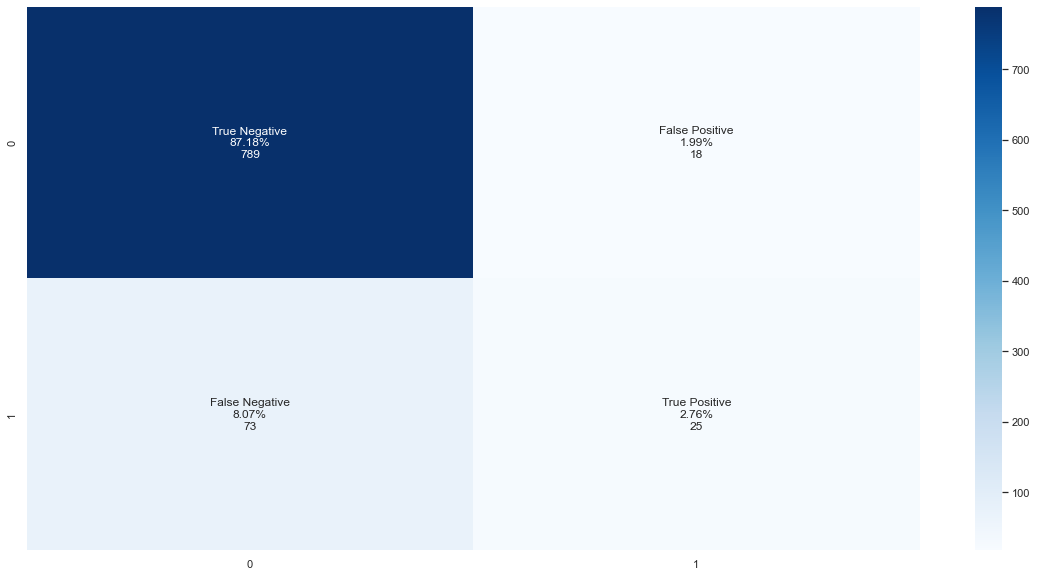

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

pip = Pipeline(
        steps=[("preprocessor", preprocessor), ("LR", LogisticRegressionCV(penalty="l1", solver= "saga", max_iter=5000, cv=5, Cs=[1]))]
    )

model = pip.fit(X_train, y_train)
y_pred_ = pip.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_)
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
               
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
               
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
               
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names, group_percentages, group_counts)]
               
labels = np.asarray(labels).reshape(2,2)

sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [29]:
print(f'Mean score of the CV is {model[1].scores_[1].mean()}')
print(f'Accuracy of the model is {accuracy_score(y_test, y_pred_)}')
print(f'Recall of the model is {recall_score(y_test, y_pred_, average="macro")}')
print(f'Precision of the model is {precision_score(y_test, y_pred_, average="macro", zero_division=1)}')

Mean score of the CV is 0.8891031078303264
Accuracy of the model is 0.8994475138121547
Recall of the model is 0.616398604051286
Precision of the model is 0.748354286947607


In [30]:
pred_subscriber = y_pred_.sum()
unique, counts = np.unique(y_pred_, return_counts=True)
subscriber = np.asarray((unique, counts)).T[1][1]
true_subscriber = cf_matrix[1][1]
profit = true_subscriber * 50 - subscriber * 10
print(f'Profit: {profit}')

Profit: 820


### Question 4 (20 points)

Now adjust the decision threshold in order to optimize the obtained profit. What would be the resulting threshold and profit? Is the propensity model built based on the targeing predicted probability useful in terms of profit maximizing? Explain your findings.

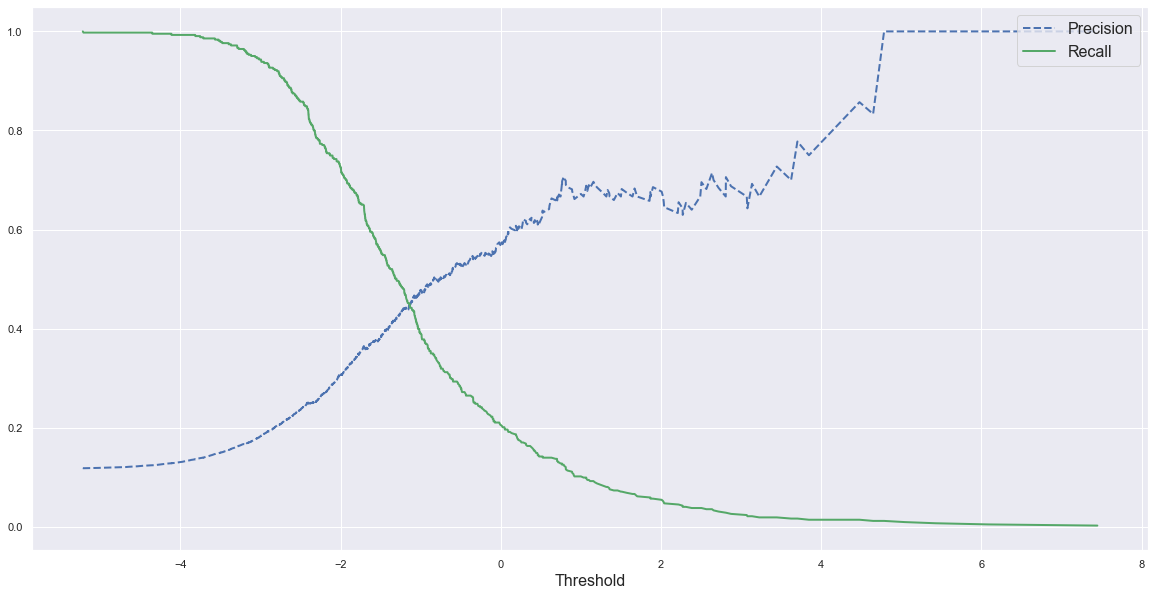

In [31]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegressionCV as LR
import matplotlib.pyplot as plt

x_features = pip[:-1].fit_transform(X)
X_train_, X_test_, y_train_, y_test_ = train_test_split(x_features, y, test_size=0.2, random_state=42)

best_m = LR(Cs=[1], max_iter=5000, penalty="l1", solver="saga")
best_m.fit(X_train_, y_train)

y_scores = cross_val_predict(best_m, X_train_, y_train_, cv = 5, method = "decision_function")


precisions, recalls, thresholds = precision_recall_curve(y_train_, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper right", fontsize=16)

plt.figure(figsize=(20, 10))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()



In [33]:
thresholds = [np.arange(-2, 0, 0.0005)]
best_m.fit(X_train_, y_train_)
threshold_df = pd.DataFrame(best_m.decision_function(X_test_))
profits = []

for i in list(thresholds[0]):
    threshold_df[i] = threshold_df[0] > i
    threshold_df[i].replace({True : 1,
                            False : 0},
                           inplace=True)
    
    cf_matrix = confusion_matrix(y_test_, threshold_df[i])
    
    pred_subscriber = threshold_df[i].sum()
    true_subscriber = cf_matrix[1][1]

    profit = true_subscriber * 50 - pred_subscriber * 10
    profits.append(profit)

threshold_profit_df = pd.DataFrame({'profit' : profits},
                                   index=thresholds[0])

threshold_profit_df.sort_values(by='profit', ascending=False).head()

,profit
-1.7260,1210
-1.7265,1210
-1.7280,1210
-1.7270,1210
-1.7275,1210


With the adjusted threshold of -1.7260, we are able to maximizie the profit to 1210€. This shows that moving the threshold is useful, because of it we were able to more than double our profit.

### Question 5 (15 points)

Now train a random forest model, with 10 decision trees and max_depth=2, what is the profit that can be achieved given the threshold that you identified earlier? Do you need to increase or decrese the threshold to maximize the profit using random forest model? Explain your result.

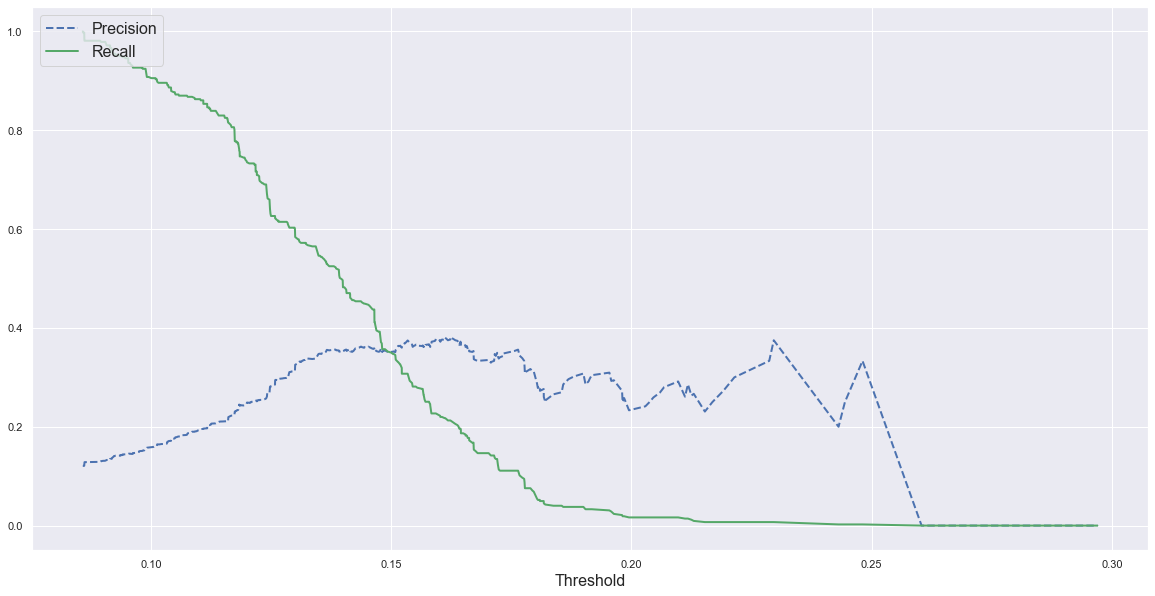

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

x_features = pip[:-1].fit_transform(X)

X_train_, X_test_, y_train_, y_test_ = train_test_split(x_features, y, test_size=0.2, random_state=42)


rndF = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=42)
rndF.fit(X_train_, y_train_)

y_scores = pd.DataFrame(cross_val_predict(rndF, X_train_, y_train_, cv=5, method="predict_proba"))[1]

precisions, recalls, thresholds = precision_recall_curve(y_train_, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)

plt.figure(figsize=(20, 10))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.show()

In [36]:
thresholds = [np.arange(-0.15, 0.25, 0.0005)]
threshold_df = pd.DataFrame(rndF.predict_proba(X_test_))
profits = []

for i in list(thresholds[0]):
    threshold_df[i] = threshold_df[1] > i
    threshold_df[i].replace({True : 1,
                            False : 0},
                           inplace=True)
    
    threshold_df[i] = threshold_df[i].astype('int64')
    
    cf_matrix = confusion_matrix(y_test_, threshold_df[i])
    
    pred_subscriber = threshold_df[i].sum()
    true_subscriber = cf_matrix[1][1]

    profit = true_subscriber * 50 - pred_subscriber * 10
    profits.append(profit)

threshold_profit_df = pd.DataFrame({'profit' : profits},
                                   index=thresholds[0])

threshold_profit_df.sort_values(by='profit', ascending=False).head()

,profit
0.1355,1120
0.1365,1120
0.1360,1120
0.1350,1120
0.1345,1120


We can see that with the Random Forest the profit drops a bit to 1120€. We can conclude that the LR with tuning thresholds performs better than the RandomForest.

Congratulations! Now you have been able to complete a end-to-end machine learning project. 